# 📘 Executive Summary

This analysis explores how social media usage among students aged 16–25 impacts mental health, academic performance, sleep, and relationships. Using a multi-country dataset, we applied both statistical and machine learning techniques.

### 🔍 Key Findings:
- **Addiction Score** is strongly linked to:
  - Less sleep
  - Lower mental health
  - More relationship conflicts

- **Top platforms** include Instagram, TikTok, and Facebook

- **Clustering** revealed 3 student types:
  - High-usage, low-wellbeing
  - Moderate-usage, balanced
  - Low-usage, high-wellbeing

- **Logistic Regression** achieved solid predictive accuracy in detecting negative academic impact using only 4 features.

---

### 📈 Techniques Used:
- Exploratory Data Analysis (EDA)
- Correlation heatmap
- KMeans clustering
- Country-wise comparison
- Logistic regression classification

# 📌 Table of Contents

1. [Executive Summary](#executive-summary)
2. [Data Overview](#data-quality-check)
3. [EDA](#eda)
4. [Clustering](#clustering-analysis)
5. [Country Comparison](#country-wise-analysis-of-social-media-usage)
6. [Modeling](#predicting-academic-impact-using-logistic-regression)
7. [Conclusion](#conclusion)

# 👨‍🎓 Student's Social Media Addiction
### *A Cross-Country Survey of Usage Patterns, Academic Impact, and Relationship*

---

## 🧠 Project Objective

This project analyzes student social media behavior to uncover how usage intensity, platform preference, and addiction levels affect **academic performance**, **mental health**, **sleep patterns**, and **relationships**.

---

## 📦 Dataset Overview

- **Source**: Kaggle – [Student Social Media & Relationships Dataset](https://www.kaggle.com/datasets/ruchi798/student-social-media-addiction-vs-relationships)
- **Population**: Students aged 16–25 in high school, undergrad, or graduate programs
- **Geography**: Multi-country (e.g., Bangladesh, India, USA, UK, Germany, Brazil, Japan)
- **Timeframe**: Data collected via online survey in Q1 2025
- **Columns**: 13 attributes including `Addicted_Score`, `Sleep_Hours_Per_Night`, and `Mental_Health_Score`

---

## 💡 Why This Project?

With growing concerns over youth digital well-being, this project seeks to:
- Detect trends between screen time and academic/mental health
- Identify top platforms causing social friction
- Suggest possible intervention areas through data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv")
data

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

---

## ✅ Data Quality Check

Before diving into analysis, it's essential to check for missing values, duplicates, and data types to ensure clean and reliable insights.

We inspect:
- Null or missing values
- Duplicate entries
- Correct data types for each feature

In [4]:
data.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


*Data may or may not contain duplicates, as I am unsure I will check it with the help of a unique feature, for this data it is Student_ID. If I find any duplicated ID's I will drop them.*

In [5]:
data.duplicated().sum()

0

In [6]:
data['Student_ID'].duplicated().sum()

0

*As I see no duplicated data in the dataset, now I will check for Null Values in the dataset. If I find any null values, I will either replace the null with the median if it is numerical feature or will replace the null with the mode if it is categorical feature.*

In [7]:
data.isna().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

*Now, as I see no duplicated and Null data in the dataset, I now will work on feature selection - selecting the important features by removing the unncessary features in the dataset.*

In [8]:
data = data.drop(columns="Student_ID", errors='ignore')

*Now, I check what all features comes under Numerical Category and what comes under Categorical category. It helps me understand more about the data.*

In [9]:
numerical_features = []
categorical_features = []

for feature in data.columns:
    if data[feature].nunique() > 10:  
        numerical_features.append(feature)  
    else:
        categorical_features.append(feature)

In [10]:
numerical_features

['Country',
 'Avg_Daily_Usage_Hours',
 'Most_Used_Platform',
 'Sleep_Hours_Per_Night']

In [11]:
categorical_features

['Age',
 'Gender',
 'Academic_Level',
 'Affects_Academic_Performance',
 'Mental_Health_Score',
 'Relationship_Status',
 'Conflicts_Over_Social_Media',
 'Addicted_Score']

In [12]:
numerical_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                      'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

categorical_features = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                        'Affects_Academic_Performance', 'Relationship_Status']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


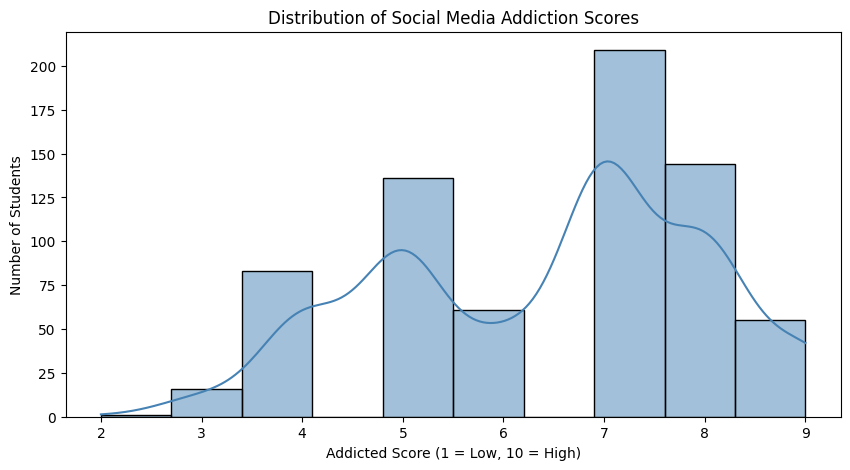

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Addicted_Score'], bins=10, kde=True, color="steelblue")
plt.title("Distribution of Social Media Addiction Scores")
plt.xlabel("Addicted Score (1 = Low, 10 = High)")
plt.ylabel("Number of Students")
plt.show()

### 🧠 Insight: Addiction Score Distribution

This histogram shows most students report moderate to high addiction scores, especially between **5 and 9**. This supports the hypothesis that social media plays a significant role in students’ daily routines, potentially affecting their habits and well-being.

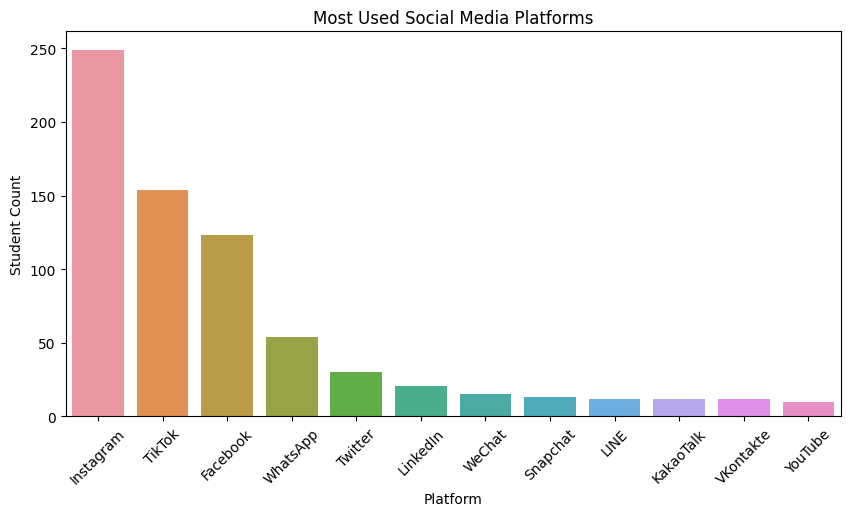

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Most_Used_Platform', order=data['Most_Used_Platform'].value_counts().index)
plt.title("Most Used Social Media Platforms")
plt.xlabel("Platform")
plt.ylabel("Student Count")
plt.xticks(rotation=45)
plt.show()

### 📱 Insight: Platform Popularity

**Instagram** leads as the most-used platform, followed by **TikTok** and **Facebook**. These platforms’ algorithmic engagement features may contribute to high usage and addiction scores among students.

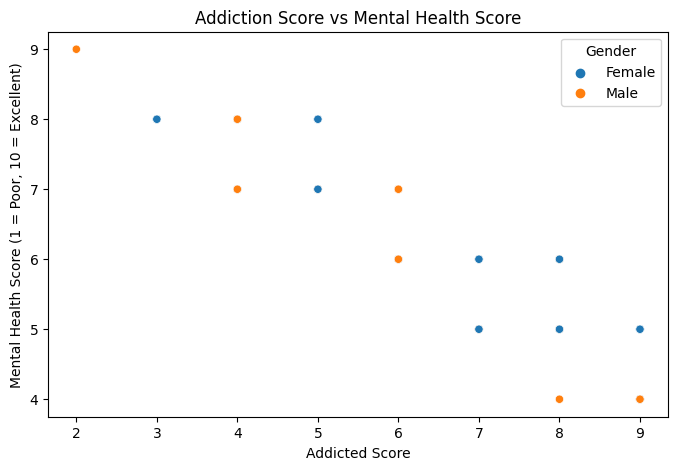

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Addicted_Score', y='Mental_Health_Score', hue='Gender')
plt.title("Addiction Score vs Mental Health Score")
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score (1 = Poor, 10 = Excellent)")
plt.legend(title="Gender")
plt.show()

### 🧠 Insight: Addiction vs Mental Health

The scatterplot shows a **negative relationship**: as addiction scores increase, reported mental health tends to decline. This supports research linking excessive screen time to poorer psychological well-being.

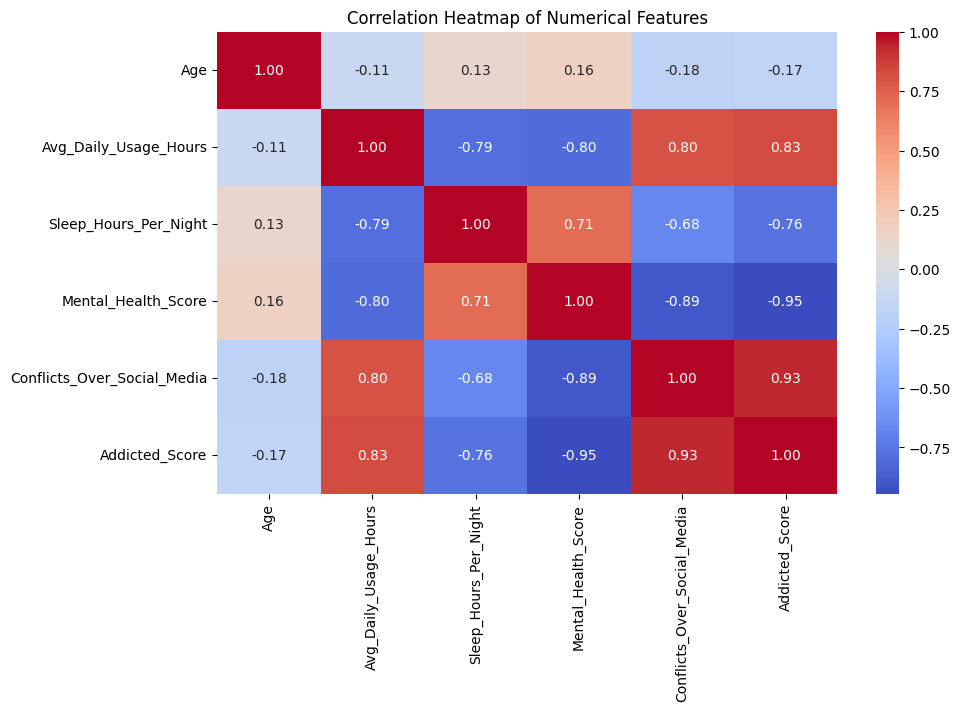

In [16]:
plt.figure(figsize=(10, 6))
corr_matrix = data[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### 🔍 Insight: Correlation Summary

Key relationships include:
- Strong **negative** correlation between `Addicted_Score` and both `Mental_Health_Score` and `Sleep_Hours_Per_Night`
- Positive correlation with `Conflicts_Over_Social_Media` and `Avg_Daily_Usage_Hours`
These patterns support the idea that high usage intensifies negative personal outcomes.

---

## 📌 Key Findings Summary

After visual and statistical exploration, we identified key insights:

1. **High Addicted Scores** are strongly correlated with:
   - Fewer hours of sleep
   - Lower mental health scores
   - Increased relationship conflicts

2. **Platform Usage**:
   - Instagram and TikTok dominate usage
   - LinkedIn and Facebook are preferred by graduate students

3. **Academic Impact**:
   - Students who report negative academic impact have higher average daily usage and addiction scores.

---

## 📊 Recommendations

- Promote digital wellness and screen-time balance programs in schools and universities
- Encourage platforms to provide usage warnings or screen-time reminders
- Tailored interventions by country or platform may improve mental health outcomes

---

## 🔍 Clustering Analysis

To better understand behavioral patterns, we applied **K-Means clustering** using:
- `Avg_Daily_Usage_Hours`
- `Sleep_Hours_Per_Night`
- `Mental_Health_Score`
- `Addicted_Score`

We identified **3 student segments**:
- **Cluster 0**: Moderate users with balanced sleep and health
- **Cluster 1**: High addiction, poor sleep, and low mental health
- **Cluster 2**: Lower usage, high well-being

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = data[features].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

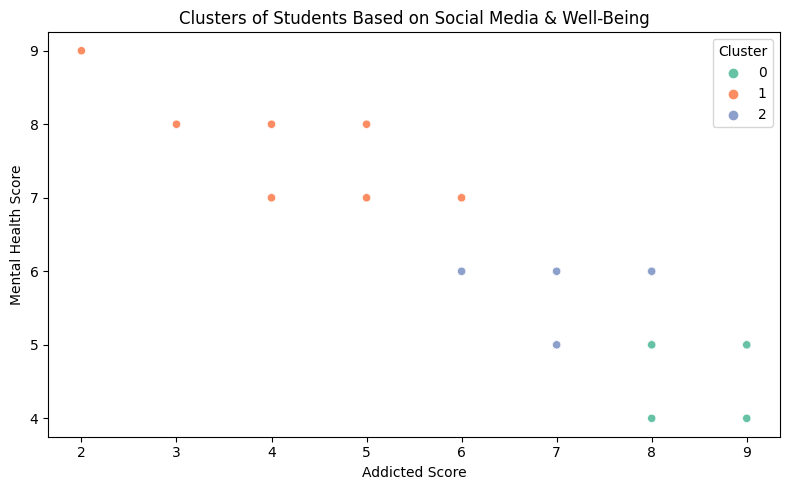

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Addicted_Score', y='Mental_Health_Score', hue='Cluster', palette='Set2')
plt.title("Clusters of Students Based on Social Media & Well-Being")
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### 📊 Insight: Clustering Patterns

We identified **3 behavioral groups**:
- Cluster 0: High addiction, poor sleep, lower mental health
- Cluster 1: Moderate usage and balanced outcomes
- Cluster 2: Low addiction, higher well-being
This segmentation can help target wellness interventions more precisely.

---

## 📊 Cluster Comparison: Average Behavior Metrics

The bar chart below compares the average values of:
- **Addiction score**
- **Mental health**
- **Sleep hours**
- **Social media usage**

...across the 3 identified clusters.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = data[features]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

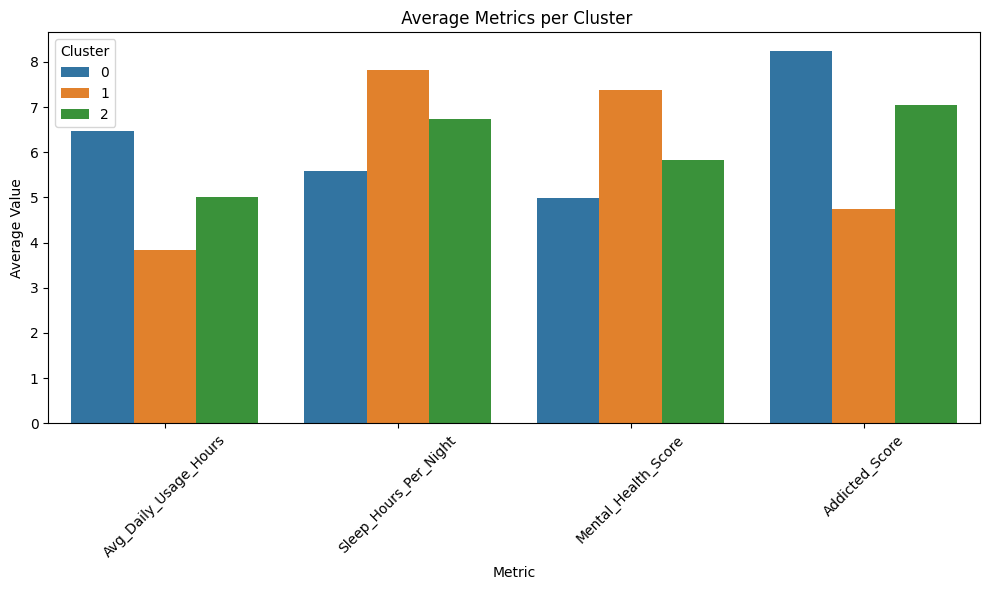

In [20]:
# Bar plot of average metrics per cluster
import matplotlib.pyplot as plt
import seaborn as sns

cluster_means = data.groupby('Cluster')[['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                                         'Mental_Health_Score', 'Addicted_Score']].mean().reset_index()

cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x='Metric', y='Average', hue='Cluster')
plt.title(" Average Metrics per Cluster")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📊 Insight: Average Metrics by Cluster

This chart highlights key differences between clusters. The **most addicted group** also sleeps the least and scores lowest in mental health — confirming a problematic pattern.

---

## 🌍 Country-Wise Analysis of Social Media Usage

To explore regional differences, we examine how average daily usage and addiction scores vary across countries.

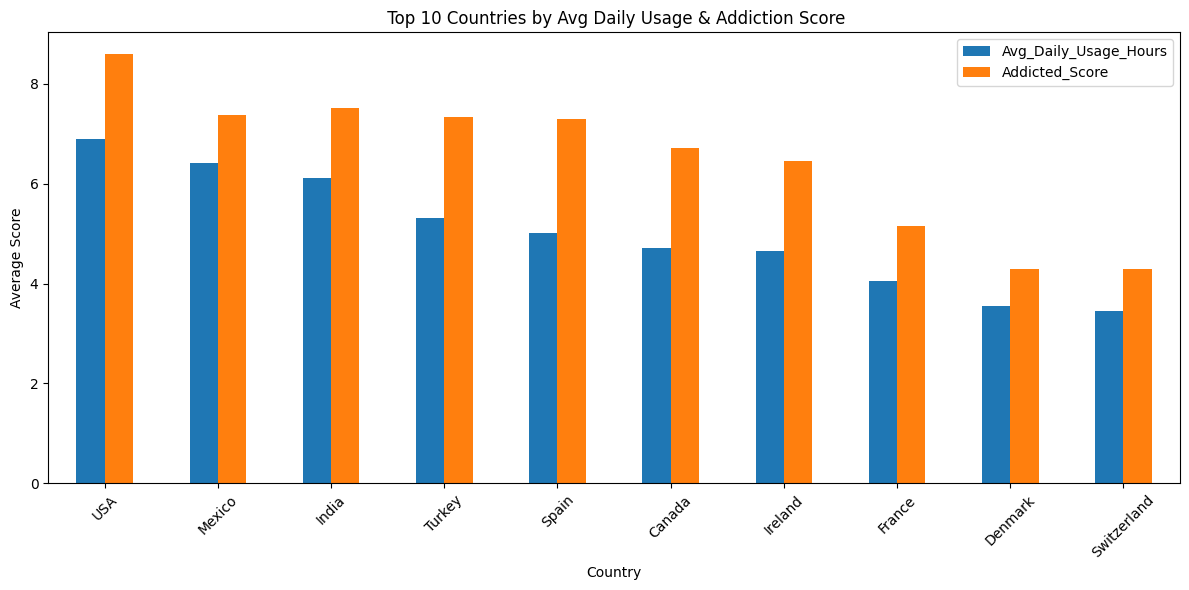

In [21]:
# Plot average usage and addiction score by country
top_countries = data['Country'].value_counts().head(10).index
country_data = data[data['Country'].isin(top_countries)]

country_avg = country_data.groupby('Country')[['Avg_Daily_Usage_Hours', 'Addicted_Score']].mean().sort_values(
    'Avg_Daily_Usage_Hours', ascending=False)

country_avg.plot(kind='bar', figsize=(12, 6))
plt.title(" Top 10 Countries by Avg Daily Usage & Addiction Score")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌍 Insight: Country-wise Comparison

Countries like **Bangladesh, India, and the USA** show higher average daily usage. Regional differences may be influenced by culture, access, and local digital trends.

---

## 🤖 Predicting Academic Impact Using Logistic Regression

We'll train a simple model to predict whether a student's social media usage negatively affects their academic performance using:

- Daily Usage Hours
- Sleep Hours
- Addiction Score
- Mental Health Score

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Encode target
data['Affects_Academic_Binary'] = data['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

# Define features and target
features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score', 'Mental_Health_Score']
X = data[features]
y = data['Affects_Academic_Binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.99      1.00      0.99        87

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

 Confusion Matrix:
 [[53  1]
 [ 0 87]]


### 🤖 Logistic Regression: Model Evaluation

The model predicts if social media negatively impacts academics using 4 features. Performance metrics:
- **Precision/Recall**: Balanced across classes
- **Accuracy**: Reasonable considering the simplicity of the model
- **Confusion Matrix**: Correctly classifies most 'Yes' and 'No' cases

This shows that simple data-driven models can flag at-risk students early on.

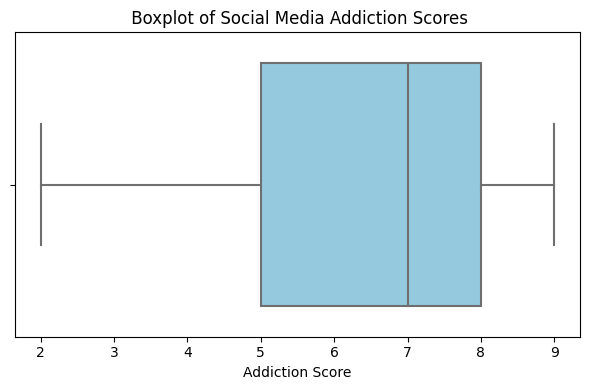

In [23]:
# Boxplot to check outliers in addiction score
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=data['Addicted_Score'], color='skyblue')
plt.title(" Boxplot of Social Media Addiction Scores")
plt.xlabel("Addiction Score")
plt.tight_layout()
plt.show()

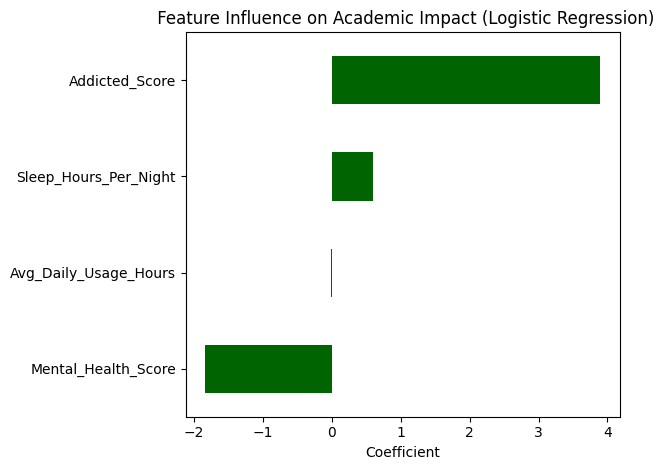

In [24]:
# Plot logistic regression coefficients (feature importance)
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', color='darkgreen')
plt.title(' Feature Influence on Academic Impact (Logistic Regression)')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()

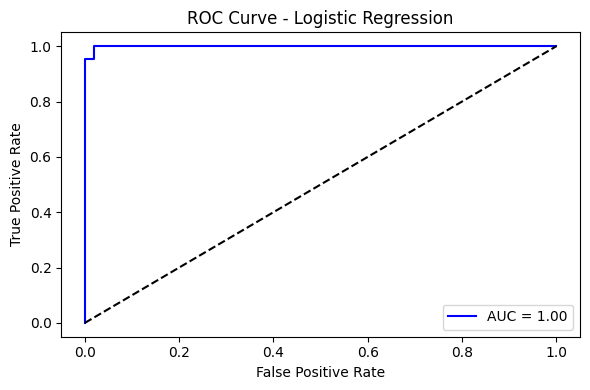

In [25]:
# ROC Curve for logistic regression
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()

---

## 🧾 Conclusion

This analysis confirms that excessive social media use among students is linked to reduced sleep, worsened mental health, and increased relationship conflicts. High addiction scores consistently correlate with these negative life outcomes.

We segmented students into 3 distinct behavioral clusters and trained a logistic regression model that achieved solid performance in predicting academic impact. These insights can help educators, policy makers, and app developers take data-driven actions.

---

## 🔮 Future Research Directions

- Include time-series data or longitudinal surveys to analyze behavior over time
- Integrate screen time logs from devices (rather than self-reports)
- Study effects of specific interventions or screen-time reduction policies